In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt  # useful for data vizualisation
import seaborn as sns

import datetime

In [48]:
dt =  pd.read_csv('/content/AB_NYC_2019.csv')

In [41]:
dt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


###DATA EXPLORATION

In [ ]:
dt['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [ ]:
dt.isna().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
dt[dt[['host_id','room_type']].duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
23,8110,CBG Helps Haiti Rm #2,22486,Lisel,Brooklyn,Park Slope,40.68001,-73.97865,Private room,110,2,71,2019-07-02,0.61,6,304
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
35,10962,"Lovely room 2 & garden; Best area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66869,-73.98780,Private room,89,4,168,2019-06-21,1.41,3,340
58,15338,Room in Greenpoint Loft w/ Roof,32169,Andrea,Brooklyn,Greenpoint,40.72401,-73.93788,Private room,49,4,138,2019-06-04,1.19,3,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365
48885,36482809,Stunning Bedroom NYC! Walking to Central Park!!,131529729,Kendall,Manhattan,East Harlem,40.79633,-73.93605,Private room,75,2,0,NaN,NaN,2,353
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36


In [ ]:
dt[dt['host_id']==32294]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
100,22918,loft bed - near transportation-15min to times sq,32294,Ssameer Or Trip,Manhattan,Harlem,40.82279,-73.95139,Private room,60,3,11,2019-01-03,0.87,3,219


In [ ]:
dt[dt['calculated_host_listings_count']<2]['host_id'].nunique()

32303

In [ ]:
dt[dt['availability_365']<30]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48881,36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NaN,NaN,1,15
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
dt[dt['availability_365']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,NaN,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,NaN,1,0


In [ ]:
print(list(dt))

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


<AxesSubplot:ylabel='Density'>

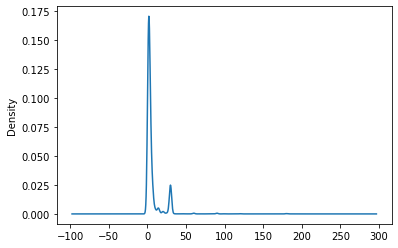

In [ ]:
dt[dt['minimum_nights']<200]['minimum_nights'].plot(kind='kde')

In [ ]:
dt[dt['minimum_nights']>180].count()

id                                81
name                              80
host_id                           81
host_name                         81
neighbourhood_group               81
neighbourhood                     81
latitude                          81
longitude                         81
room_type                         81
price                             81
minimum_nights                    81
number_of_reviews                 81
last_review                       45
reviews_per_month                 45
calculated_host_listings_count    81
availability_365                  81
dtype: int64

In [ ]:
dt['availability_365'].describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [ ]:
dt['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

<AxesSubplot:ylabel='Density'>

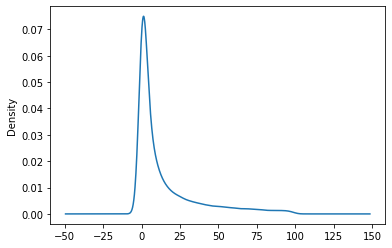

In [ ]:

dt[dt['number_of_reviews']<100]['number_of_reviews'].plot(kind='kde')

In [ ]:
dt[dt['number_of_reviews']>100].count()

id                                2995
name                              2995
host_id                           2995
host_name                         2992
neighbourhood_group               2995
neighbourhood                     2995
latitude                          2995
longitude                         2995
room_type                         2995
price                             2995
minimum_nights                    2995
number_of_reviews                 2995
last_review                       2995
reviews_per_month                 2995
calculated_host_listings_count    2995
availability_365                  2995
dtype: int64

In [ ]:
dt[dt['number_of_reviews']==0].count()

In [ ]:
dt[dt['number_of_reviews']>0]['number_of_reviews'].describe()

count    38843.000000
mean        29.297557
std         48.186374
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [ ]:
dt['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
dt[dt['host_id']==244361589]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42074,32678718,Luxury accommodation minutes from Central Park!,244361589,Row NYC,Manhattan,Theater District,40.75781,-73.98903,Private room,499,1,0,NaN,NaN,9,293
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
42077,32678721,Nice Room 1 block away from Times Square action!,244361589,Row NYC,Manhattan,Theater District,40.75783,-73.98908,Private room,100,1,38,2019-07-04,14.62,9,295
42078,32678723,Spacious room in the Heart of Midtown!,244361589,Row NYC,Manhattan,Theater District,40.75803,-73.98887,Private room,100,1,6,2019-06-15,2.61,9,289
42079,32678724,Steps from varied cuisines at Restaurant Row!,244361589,Row NYC,Manhattan,Theater District,40.75792,-73.98900,Private room,249,1,0,NaN,NaN,9,278
42080,32678725,Enjoy the Times Square experience with the fam...,244361589,Row NYC,Manhattan,Theater District,40.75976,-73.98761,Private room,249,1,22,2019-06-23,7.59,9,283
42081,32678726,Steps away from the Heart of the Theater Distr...,244361589,Row NYC,Manhattan,Theater District,40.75925,-73.98767,Private room,100,1,1,2019-05-04,0.45,9,299
42082,32678727,In the center of all Broadway Theater ACTION!,244361589,Row NYC,Manhattan,Theater District,40.75821,-73.98820,Private room,249,1,0,NaN,NaN,9,298


###FEATURE ENGINEERING

columns to create:

'id': leave, potentially drop it at the end. 

'name': leave, potentially drop it at the end.

'host_id': add column with avg price host listing, then drop it; YU

'host_name': leave potentially drop

'neighbourhood_group': one hot encode YU

'neighbourhood': one hot encode YU

'latitude', 'longitude': leave

'room_type': one hot encode YU

'price': target variable, leave

'minimum_nights': one hot encoding in categories. 1-30 days (vacation), 30-360 days (short term lease), >360 (long term) YU

'number_of_reviews': quantile encoding + "0 reviews column" LU

'**last_review**': number of days since 2019/07/08 LU

'reviews_per_month': null values as 0 and normalize LU 

'**calculated_host_listings_count**': one hot encoding for number of listings (1,2-10, >10) LU

'**availability_365**': encode -  event (< 30 days), seasonal (30-180 days), professional (>180 days) LU





In [49]:
#DEFINE THE CATEGORY THRESHOLDS: 

#MIN NIGHTS: we want to define three categories based on client behavior
#1-30 days = vacation
#30-360 days = short term lease
#>360 days = long term lease
vacation_threshold = 30
short_term_threshold = 360


#AVAILABILITY_36: we want to define three categories based on renter behavior
#1-30 days = event
#30-180 days = seasonal
#>180 days = professional
event_threshold = 30
seasonal_threshold = 180

#CALCULATED HOST LISTING COUNT: we want to define three categories based on renter behavior
#1 listing: rookie host
#2-10 listings: multi property host
#>10 listings: super host
rookie_threshold = 1
multiprop_threshold = 10


In [50]:
#MAPPING FUNCTIONS
# create a function to map the min_nights values to the appropriate category
def categorize_min_nights(nights):
    if nights <= event_threshold:
        return 'event'
    elif nights <= short_term_threshold:
        return 'short_term_lease'
    else:
        return 'long_term'

# create a function to map the availability_365 values to the appropriate category
def categorize_availabilty(days):
    if days <= vacation_threshold:
        return 'vacation'
    elif days <= seasonal_threshold:
        return 'seasonal'
    else:
        return 'professional'

# create a function to map the number of listings values to the appropriate category
def categorize_listing_count(listing):
    if listing == rookie_threshold:
        return 'rookie'
    elif listing <= multiprop_threshold:
        return 'multiprop'
    else:
        return 'super_host'

In [51]:

def preprocessing(data):
    df = data.copy()
    
    #VARIABLE - HOST ID
    # Calculate the mean price for each host_id
    host_means = df.groupby('host_id')['price'].mean()

    # Map the host means to the host_id column
    df['mean_price_per_host'] = df['host_id'].map(host_means)
    
    #VARIABLES TO HOT ENCODE: minimum_nights, availability_365, calculated_host_listings_count, neighbourhood_group, neighbourhood, room_type 
    # apply the categorize_min_nights function to the minimum_nights column and create one hot encoded columns
    df['min_nights_category'] = df['minimum_nights'].apply(categorize_min_nights)
    df['availability_365_category'] = df['availability_365'].apply(categorize_availabilty)
    df['listing_category'] = df['calculated_host_listings_count'].apply(categorize_listing_count)
    
    one_hot_encode_columns = ['neighbourhood_group', 'neighbourhood', "room_type",'min_nights_category','availability_365_category','listing_category']
    
    #one hot encoding variables
    for i in one_hot_encode_columns:
        one_hot_encoded = pd.get_dummies(df[i])
        df = pd.concat([df, one_hot_encoded], axis=1)
    
    #VARIABLE - LAST REVIEW
    #transforming column into datetime type
    df['last_review'] = pd.to_datetime(df['last_review'])
    #reference day to compute days from
    day = datetime.datetime(2019, 7, 8)

    #computing the number of days since the last review
    df['n_days'] = (day - df['last_review'])/np.timedelta64(1, 'D')

    #filling the missing values with the median 
    df['n_days'] = df['n_days'].fillna(df['n_days'].median())

    #VARIABLE - REVIEWS PER MONTH
    #filling the missing values
    df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

    #detecting the outliers
    Q1_rev = df['reviews_per_month'].quantile(0.25)
    Q3_rev = df['reviews_per_month'].quantile(0.75)
    IQR = Q3_rev - Q1_rev
    whisker_width = 1.5
    upper_whisker = Q3_rev + (whisker_width*IQR)

    #capping the outliers
    df.loc[df['reviews_per_month'] > upper_whisker, 'reviews_per_month'] = upper_whisker

    #VARIABLE - NUMBER OF REVIEWS
    #quantile encoding
    Q1 = df['number_of_reviews'].quantile(0.25)
    Q2 = df['number_of_reviews'].quantile(0.5)
    Q3 = df['number_of_reviews'].quantile(0.75)

    df['number_of_reviews_quant'] = np.where((df.number_of_reviews <= Q1), 1,   
                 np.where((df.number_of_reviews>Q1) & (df.number_of_reviews<=Q2), 2,
                  np.where((df.number_of_reviews>Q2) & (df.number_of_reviews<=Q3), 3,
                    4)))  
    
    #keeping track of the rows with no reviews
    df['zero_reviews'] = np.where(df.number_of_reviews == 0,1,0)  


    #dropping the columns that are no longer needed
    df = df.drop(['id', 'name', "host_id", "host_name", 'neighbourhood_group', 'neighbourhood', "room_type", 'min_nights_category','availability_365_category','listing_category','minimum_nights','availability_365','calculated_host_listings_count','last_review','number_of_reviews' ], axis = 1)
    
    return df

In [52]:
dt = preprocessing(dt)

In [56]:
#Checking that all the columns that had to be canceled, have been canceled
l = ['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','minimum_nights',
     'number_of_reviews','last_review','calculated_host_listings_count','availability_365']

for i in l: 
  if i in list(dt):
    print(i)